In [13]:
# ============================================================================
# SECTION 1: DATA LOADING AND INITIAL EXPLORATION
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("\n[SECTION 1] DATA LOADING AND EXPLORATION")
print("-"*80)

# Upload file
from google.colab import files
uploaded = files.upload()

# Get filename automatically
file_name = list(uploaded.keys())[0]

# Load dataset
df = pd.read_csv(file_name)

print("\n" + "=" * 60)
print("LOADING DATASET")
print("=" * 60)

print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

print("\n--- First Few Records ---")
display(df.head())

print("\n--- Dataset Information ---")
df.info()

print("\n--- Statistical Summary ---")
display(df.describe())

print("\n--- Column Names ---")
print(df.columns.tolist())

print("\n\n[SECTION 2] DATA QUALITY ASSESSMENT")
print("-"*80)

# Missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})

print("\n--- Missing Values ---")
display(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✓ No missing values found in the dataset")

# Duplicate records
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Records ---")
print(f"Total Duplicates: {duplicates}")

if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"✓ Removed {duplicates} duplicate records")



[SECTION 1] DATA LOADING AND EXPLORATION
--------------------------------------------------------------------------------


Saving predictive_maintenance.csv to predictive_maintenance (4).csv

LOADING DATASET

Dataset Shape: (10000, 10)
Total Records: 10000
Total Features: 10

--- First Few Records ---


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB

--- Statistical Summary ---


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000



--- Column Names ---
['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Failure Type']


[SECTION 2] DATA QUALITY ASSESSMENT
--------------------------------------------------------------------------------

--- Missing Values ---


,Missing_Count,Percentage


✓ No missing values found in the dataset

--- Duplicate Records ---
Total Duplicates: 0


In [14]:
# ============================================================================
# SECTION 3: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================
print("\n\n[SECTION 3] EXPLORATORY DATA ANALYSIS")
print("-"*80)

# Target variable distribution
print("\n--- Target Variable Distribution ---")
target_col = 'Machine failure' if 'Machine failure' in df.columns else 'Target'
print(df[target_col].value_counts())
print(f"\nClass Balance:")
print(df[target_col].value_counts(normalize=True) * 100)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID and target from analysis
if 'UDI' in numerical_cols:
    numerical_cols.remove('UDI')
if 'Product ID' in categorical_cols:
    categorical_cols.remove('Product ID')
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"\nNumerical Features ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Features ({len(categorical_cols)}): {categorical_cols}")



[SECTION 3] EXPLORATORY DATA ANALYSIS
--------------------------------------------------------------------------------

--- Target Variable Distribution ---
Target
0    9661
1     339
Name: count, dtype: int64

Class Balance:
Target
0    96.61
1     3.39
Name: proportion, dtype: float64

Numerical Features (5): ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
Categorical Features (2): ['Type', 'Failure Type']




[SECTION 4] FEATURE DISTRIBUTION VISUALIZATION
--------------------------------------------------------------------------------
✓ Saved: feature_distributions.png


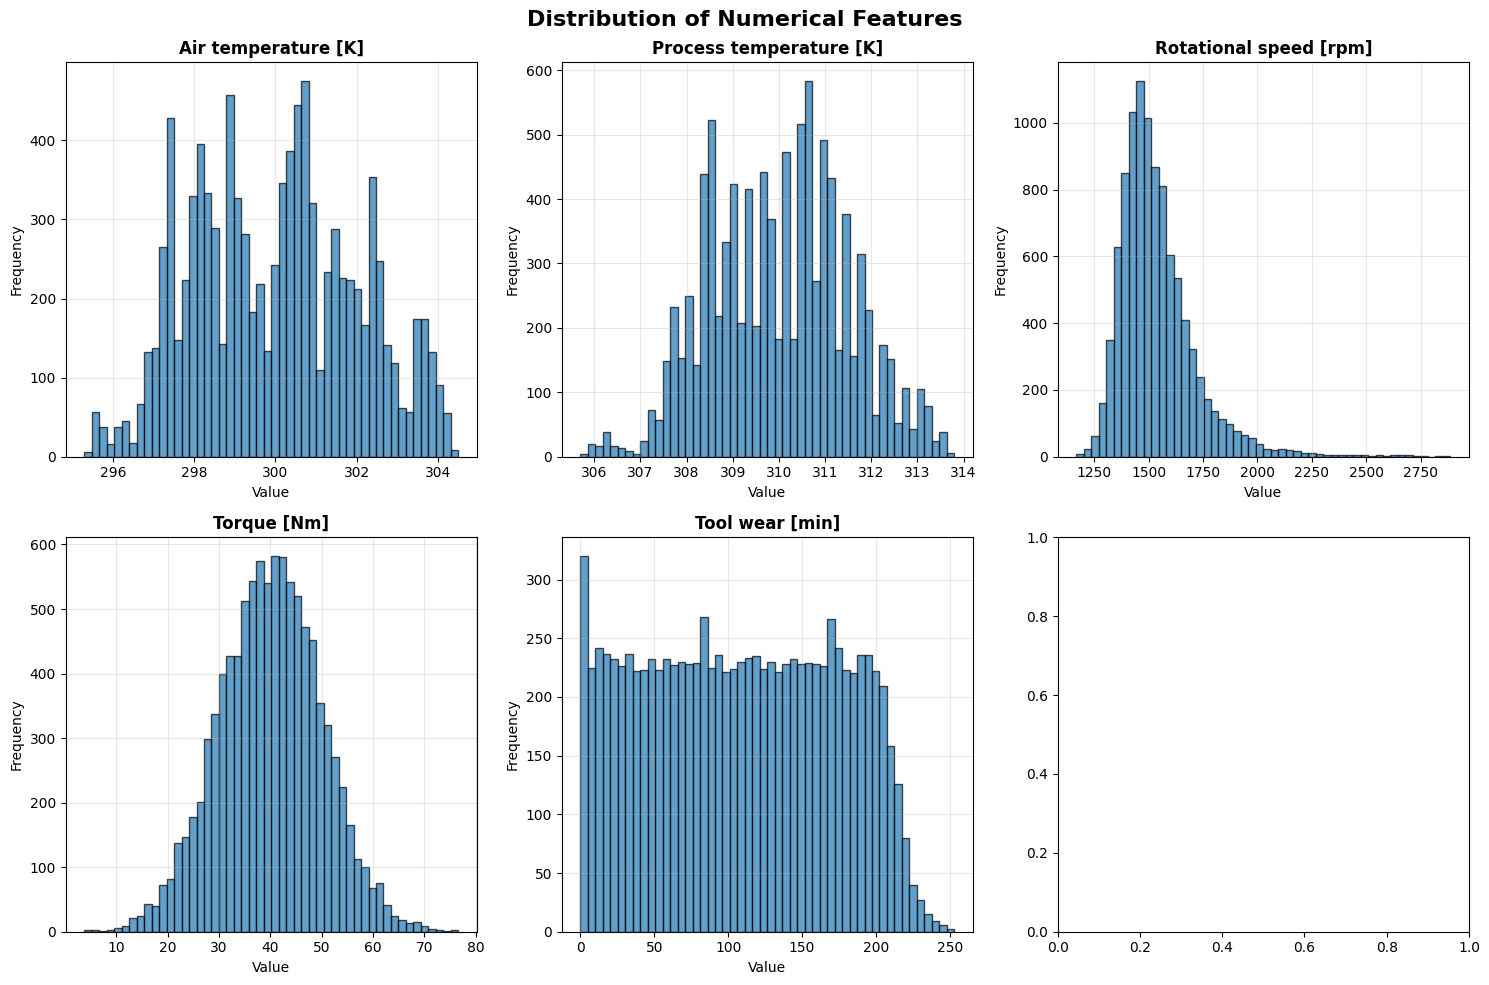

In [15]:
# ============================================================================
# SECTION 4: VISUALIZATION - FEATURE DISTRIBUTIONS
# ============================================================================
print("\n\n[SECTION 4] FEATURE DISTRIBUTION VISUALIZATION")
print("-"*80)

# Plot distributions of numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols[:6]):
    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(col, fontweight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Saved: feature_distributions.png")



[SECTION 5] OUTLIER DETECTION AND TREATMENT
--------------------------------------------------------------------------------
✓ Saved: outlier_detection.png

--- Outlier Summary ---
Air temperature [K]: 0 outliers (0.00%)
Process temperature [K]: 0 outliers (0.00%)
Rotational speed [rpm]: 418 outliers (4.18%)
Torque [Nm]: 69 outliers (0.69%)
Tool wear [min]: 0 outliers (0.00%)

✓ Outliers capped using IQR method


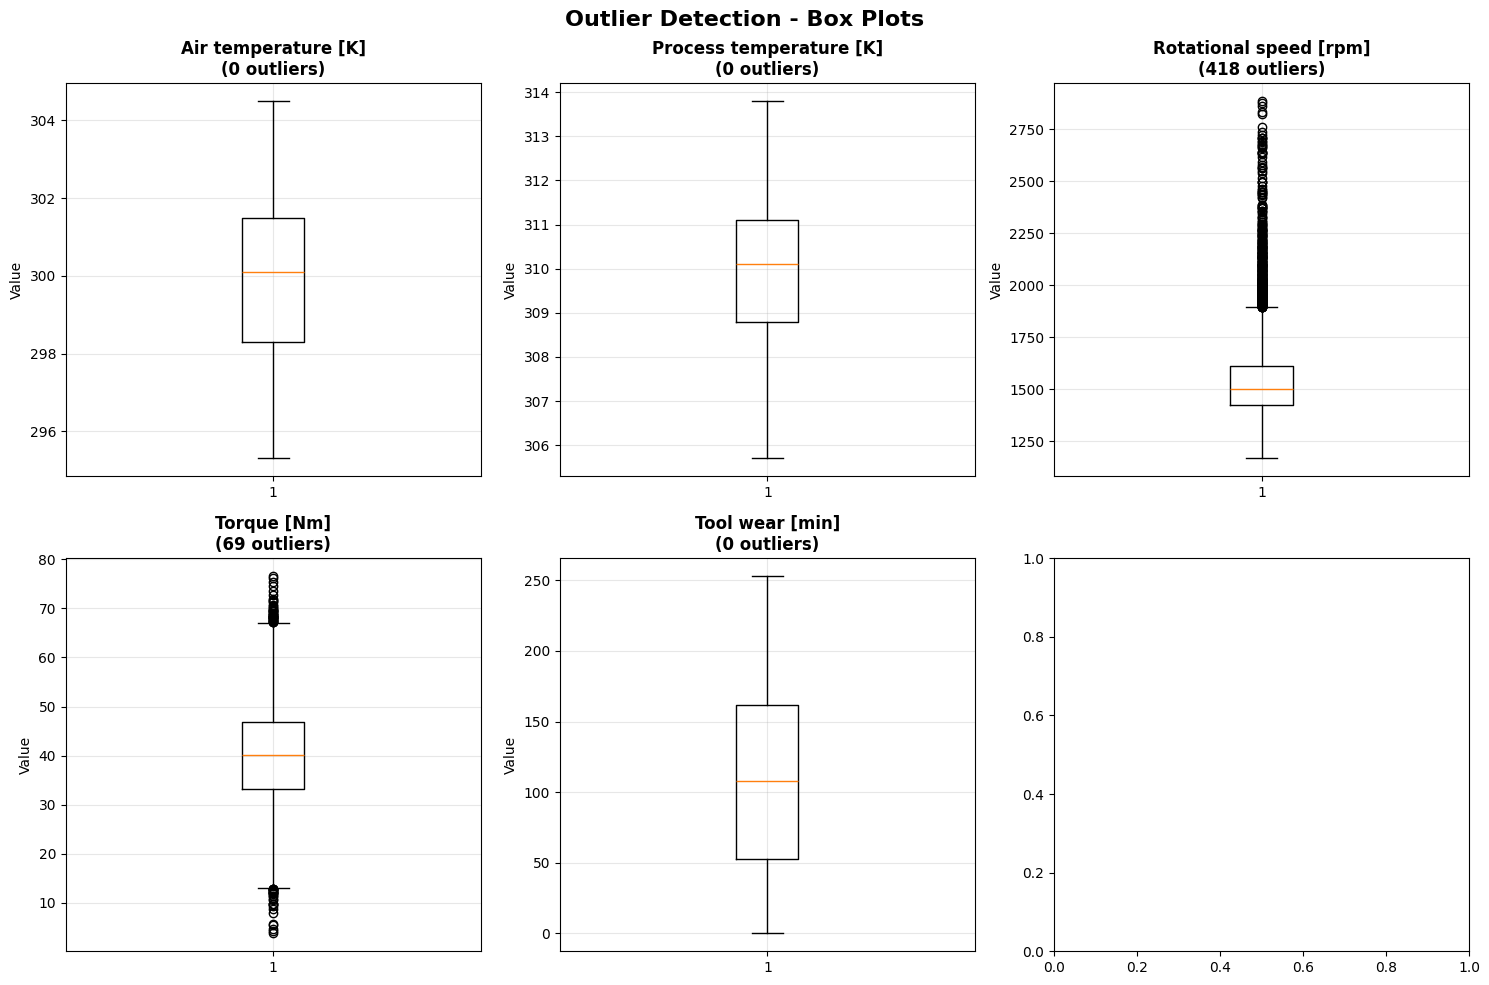

In [16]:
# ============================================================================
# SECTION 5: OUTLIER DETECTION AND TREATMENT
# ============================================================================
print("\n\n[SECTION 5] OUTLIER DETECTION AND TREATMENT")
print("-"*80)

# Detect outliers using IQR method
outlier_summary = {}

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Outlier Detection - Box Plots', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols[:6]):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

    row = idx // 3
    col_idx = idx % 3
    axes[row, col_idx].boxplot(df[col])
    axes[row, col_idx].set_title(f'{col}\n({len(outliers)} outliers)', fontweight='bold')
    axes[row, col_idx].set_ylabel('Value')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('outlier_detection.png', dpi=300, bbox_inches='tight')
print("✓ Saved: outlier_detection.png")

print("\n--- Outlier Summary ---")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers ({count/len(df)*100:.2f}%)")

# Cap outliers using IQR method (keeping them within bounds)
df_processed = df.copy()
for col in numerical_cols:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_processed[col] = df_processed[col].clip(lower=lower_bound, upper=upper_bound)

print("\n✓ Outliers capped using IQR method")



[SECTION 6] CORRELATION ANALYSIS
--------------------------------------------------------------------------------
✓ Saved: correlation_heatmap.png

--- Correlation with Target Variable ---
Target                     1.000000
Torque [Nm]                0.190806
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.130467
Name: Target, dtype: float64


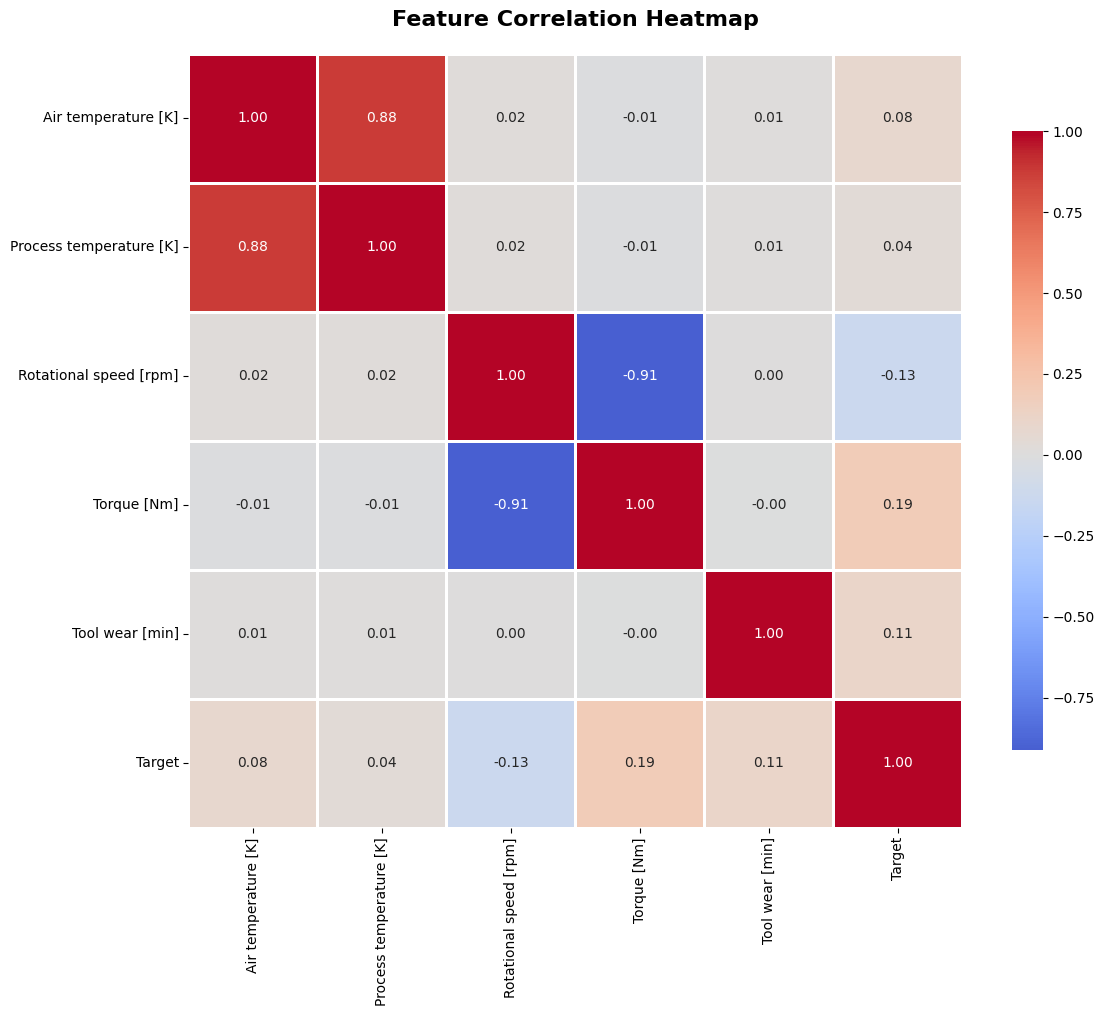

In [17]:
# ============================================================================
# SECTION 6: CORRELATION ANALYSIS
# ============================================================================
print("\n\n[SECTION 6] CORRELATION ANALYSIS")
print("-"*80)

# Correlation matrix
corr_matrix = df_processed[numerical_cols + [target_col]].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Saved: correlation_heatmap.png")

# Print correlations with target
print("\n--- Correlation with Target Variable ---")
target_corr = corr_matrix[target_col].sort_values(ascending=False)
print(target_corr)

In [20]:
# ============================================================================
# SECTION 7: FEATURE ENGINEERING
# ============================================================================
from sklearn.preprocessing import LabelEncoder

print("\n\n[SECTION 7] FEATURE ENGINEERING")
print("-"*80)

# Create new features based on domain knowledge
if 'Air temperature [K]' in df_processed.columns and 'Process temperature [K]' in df_processed.columns:
    df_processed['Temperature_diff'] = df_processed['Process temperature [K]'] - df_processed['Air temperature [K]']
    print("✓ Created: Temperature_diff")

if 'Torque [Nm]' in df_processed.columns and 'Rotational speed [rpm]' in df_processed.columns:
    df_processed['Power'] = df_processed['Torque [Nm]'] * df_processed['Rotational speed [rpm]'] / 9550
    print("✓ Created: Power")

if 'Tool wear [min]' in df_processed.columns:
    df_processed['Tool_wear_squared'] = df_processed['Tool wear [min]'] ** 2
    print("✓ Created: Tool_wear_squared")

# Encode categorical variables
if 'Type' in df_processed.columns:
    le = LabelEncoder()
    df_processed['Type_encoded'] = le.fit_transform(df_processed['Type'])
    print("✓ Encoded: Type variable")

# Verify no string columns remain in numeric features
print("\n--- Data Type Verification ---")
numeric_features = df_processed.select_dtypes(include=[np.number]).columns
object_features = df_processed.select_dtypes(include=['object']).columns
print(f"Numeric features: {len(numeric_features)}")
print(f"Object/String features: {len(object_features)}")
if len(object_features) > 0:
    print(f"Non-numeric columns: {object_features.tolist()}")




[SECTION 7] FEATURE ENGINEERING
--------------------------------------------------------------------------------
✓ Created: Temperature_diff
✓ Created: Power
✓ Created: Tool_wear_squared
✓ Encoded: Type variable

--- Data Type Verification ---
Numeric features: 11
Object/String features: 3
Non-numeric columns: ['Product ID', 'Type', 'Failure Type']


In [24]:
# ============================================================================
# SECTION 8: DATA PREPROCESSING FOR MODELING
# ============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



print("\n\n[SECTION 8] DATA PREPROCESSING FOR MODELING")
print("-"*80)

# Select features for modeling - ONLY NUMERIC FEATURES
# Exclude ID columns, target, original categorical columns, and failure type columns
exclude_cols = ['UDI', 'Product ID', target_col, 'Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type']

feature_cols = [col for col in df_processed.columns
                if col not in exclude_cols and df_processed[col].dtype in ['int64', 'float64']]

X = df_processed[feature_cols]
y = df_processed[target_col]

print(f"\nFeatures selected for modeling: {len(feature_cols)}")
print(feature_cols)

# Verify all features are numeric
print(f"\nFeature data types:")
print(X.dtypes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n✓ Feature scaling completed (StandardScaler)")

# Handle class imbalance using SMOTE
print("\n--- Handling Class Imbalance ---")
print(f"Before SMOTE: {dict(pd.Series(y_train).value_counts())}")

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"After SMOTE: {dict(pd.Series(y_train_balanced).value_counts())}")
print("✓ Applied SMOTE for balancing classes")




[SECTION 8] DATA PREPROCESSING FOR MODELING
--------------------------------------------------------------------------------

Features selected for modeling: 9
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Temperature_diff', 'Power', 'Tool_wear_squared', 'Type_encoded']

Feature data types:
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]     float64
Torque [Nm]                float64
Tool wear [min]              int64
Temperature_diff           float64
Power                      float64
Tool_wear_squared            int64
Type_encoded                 int64
dtype: object

Training set size: 8000
Test set size: 2000

✓ Feature scaling completed (StandardScaler)

--- Handling Class Imbalance ---
Before SMOTE: {0: np.int64(7729), 1: np.int64(271)}
After SMOTE: {0: np.int64(7729), 1: np.int64(7729)}
✓ Applied SMOTE for balancing classes


In [27]:
# ============================================================================
# SECTION 9: MODEL TRAINING AND EVALUATION
# ============================================================================
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

print("\n\n[SECTION 9] MODEL TRAINING AND EVALUATION")
print("-"*80)

# Dictionary to store results
results = {}

# Model 1: Logistic Regression
print("\n[1] Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)
y_pred_lr = lr_model.predict(X_test_scaled)

results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_lr),
    'Precision': precision_score(y_test, y_pred_lr),
    'Recall': recall_score(y_test, y_pred_lr),
    'F1-Score': f1_score(y_test, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
}
print("✓ Logistic Regression completed")

# Model 2: Random Forest
print("\n[2] Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_model.predict(X_test_scaled)

results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
}
print("✓ Random Forest completed")

# Model 3: Gradient Boosting
print("\n[3] Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)
y_pred_gb = gb_model.predict(X_test_scaled)

results['Gradient Boosting'] = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1-Score': f1_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, gb_model.predict_proba(X_test_scaled)[:, 1])
}
print("✓ Gradient Boosting completed")

# Model 4: SVM
print("\n[4] Training Support Vector Machine...")
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_balanced, y_train_balanced)
y_pred_svm = svm_model.predict(X_test_scaled)

results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm),
    'ROC-AUC': roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
}
print("✓ SVM completed")



[SECTION 9] MODEL TRAINING AND EVALUATION
--------------------------------------------------------------------------------

[1] Training Logistic Regression...
✓ Logistic Regression completed

[2] Training Random Forest...
✓ Random Forest completed

[3] Training Gradient Boosting...
✓ Gradient Boosting completed

[4] Training Support Vector Machine...
✓ SVM completed


In [28]:
# ============================================================================
# SECTION 10: RESULTS COMPARISON
# ============================================================================
print("\n\n[SECTION 10] MODEL PERFORMANCE COMPARISON")
print("-"*80)

results_df = pd.DataFrame(results).T
print("\n", results_df)

# Find best model
best_model_name = results_df['F1-Score'].idxmax()
best_model = {'Logistic Regression': lr_model, 'Random Forest': rf_model,
              'Gradient Boosting': gb_model, 'SVM': svm_model}[best_model_name]
best_predictions = {'Logistic Regression': y_pred_lr, 'Random Forest': y_pred_rf,
                   'Gradient Boosting': y_pred_gb, 'SVM': y_pred_svm}[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")
print(f"F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")




[SECTION 10] MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------

                      Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression    0.8635   0.182663  0.867647  0.301790  0.928077
Random Forest          0.9735   0.577320  0.823529  0.678788  0.968594
Gradient Boosting      0.9425   0.362573  0.911765  0.518828  0.974969
SVM                    0.9300   0.312500  0.882353  0.461538  0.970299

🏆 Best Model: Random Forest
F1-Score: 0.6788




[SECTION 11] DETAILED EVALUATION - BEST MODEL
--------------------------------------------------------------------------------

--- Classification Report: Random Forest ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.58      0.82      0.68        68

    accuracy                           0.97      2000
   macro avg       0.79      0.90      0.83      2000
weighted avg       0.98      0.97      0.98      2000


✓ Saved: confusion_matrix.png


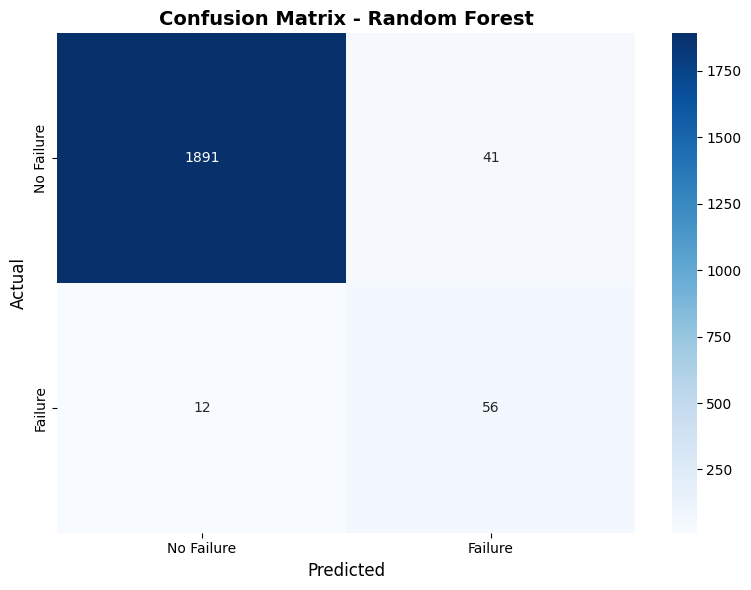

In [29]:
# ============================================================================
# SECTION 11: DETAILED EVALUATION OF BEST MODEL
# ============================================================================
from sklearn.metrics import classification_report, confusion_matrix

print("\n\n[SECTION 11] DETAILED EVALUATION - BEST MODEL")
print("-"*80)

print(f"\n--- Classification Report: {best_model_name} ---")
print(classification_report(y_test, best_predictions))

# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Failure', 'Failure'],
            yticklabels=['No Failure', 'Failure'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: confusion_matrix.png")



[SECTION 12] COMPARISON VISUALIZATIONS
--------------------------------------------------------------------------------
✓ Saved: model_comparison.png
✓ Saved: roc_curves.png


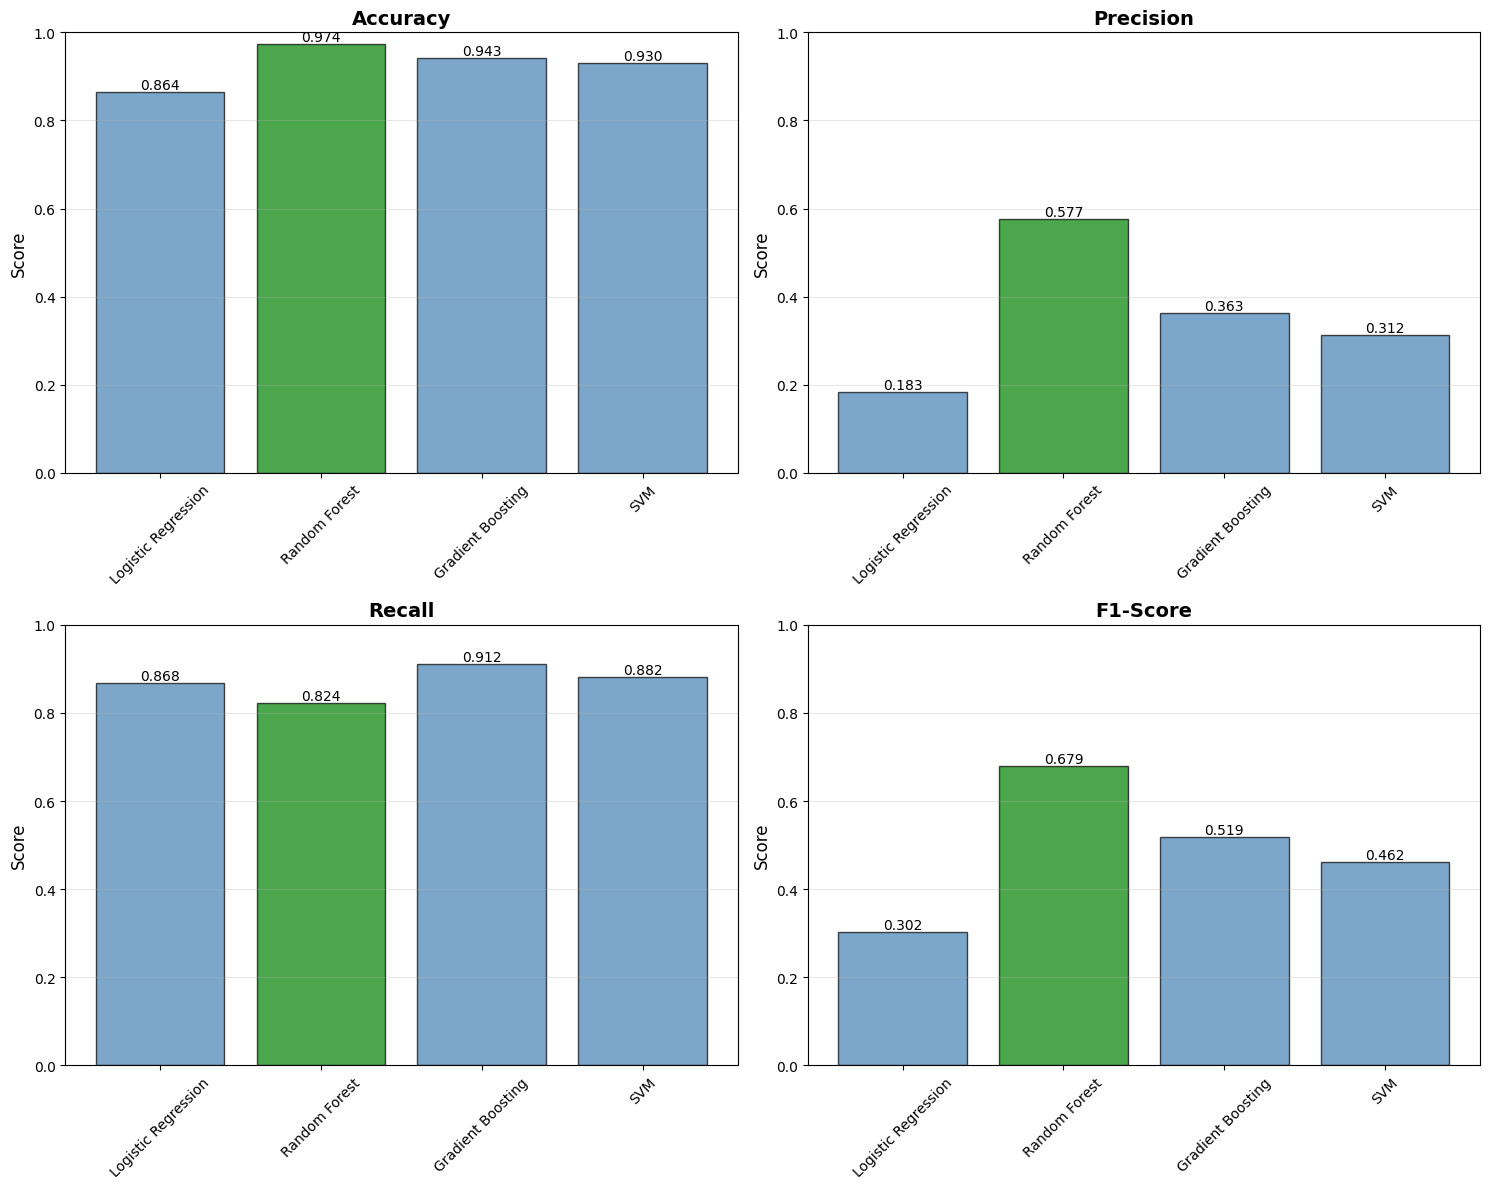

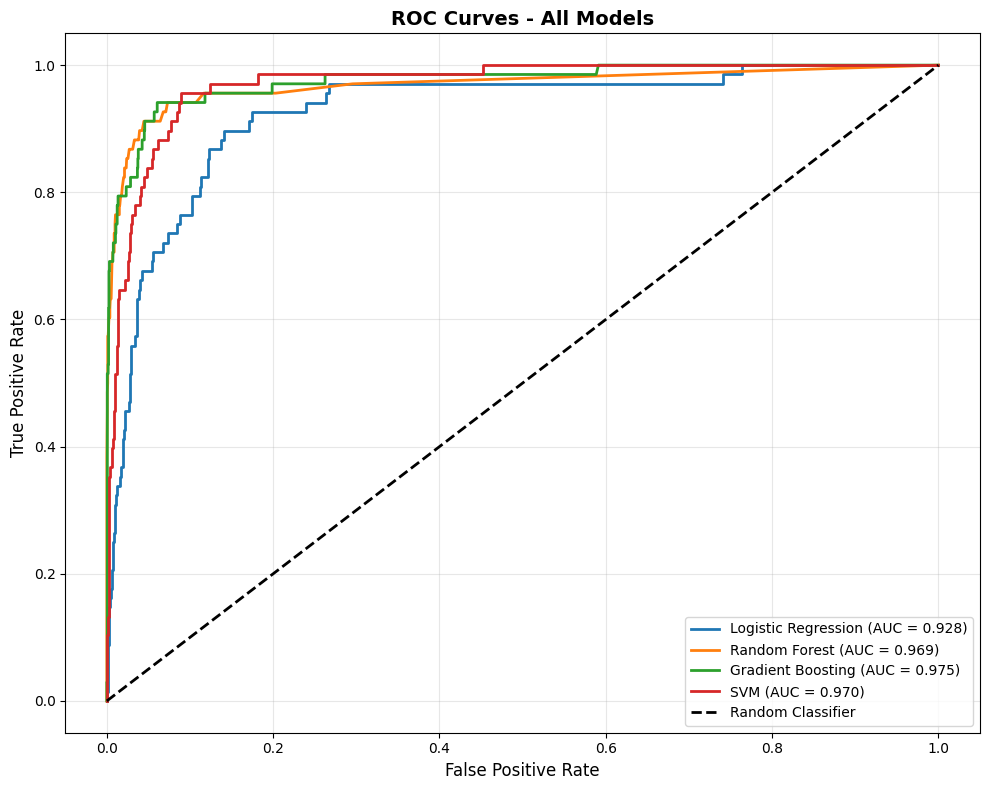

In [31]:
# ============================================================================
# SECTION 12: MODEL COMPARISON VISUALIZATIONS
# ============================================================================
from sklearn.metrics import roc_curve

print("\n\n[SECTION 12] COMPARISON VISUALIZATIONS")
print("-"*80)

# Bar plot for model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    values = results_df[metric].values
    colors = ['green' if model == best_model_name else 'steelblue'
              for model in results_df.index]

    bars = ax.bar(results_df.index, values, color=colors, alpha=0.7, edgecolor='black')
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12)
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10)

    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: model_comparison.png")

# ROC Curves
plt.figure(figsize=(10, 8))

models_dict = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model,
    'SVM': svm_model
}

for name, model in models_dict.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
print("✓ Saved: roc_curves.png")




[SECTION 13] FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

--- Top 10 Important Features ---
                   Feature  Importance
2   Rotational speed [rpm]    0.227454
3              Torque [Nm]    0.205561
6                    Power    0.171115
7        Tool_wear_squared    0.132345
4          Tool wear [min]    0.087343
5         Temperature_diff    0.086590
0      Air temperature [K]    0.044325
1  Process temperature [K]    0.024113
8             Type_encoded    0.021154

✓ Saved: feature_importance.png


[SECTION 14] CROSS-VALIDATION ANALYSIS
--------------------------------------------------------------------------------

Random Forest - 5-Fold Cross-Validation F1-Scores:
Scores: [0.98029079 0.99031008 0.98301826 0.98588839 0.98779705]
Mean: 0.9855
Std: 0.0035


PHASE 2 IMPLEMENTATION COMPLETED SUCCESSFULLY

📊 Generated Visualizations:
   • feature_distributions.png
   • outlier_detection.png
   • correlation_he

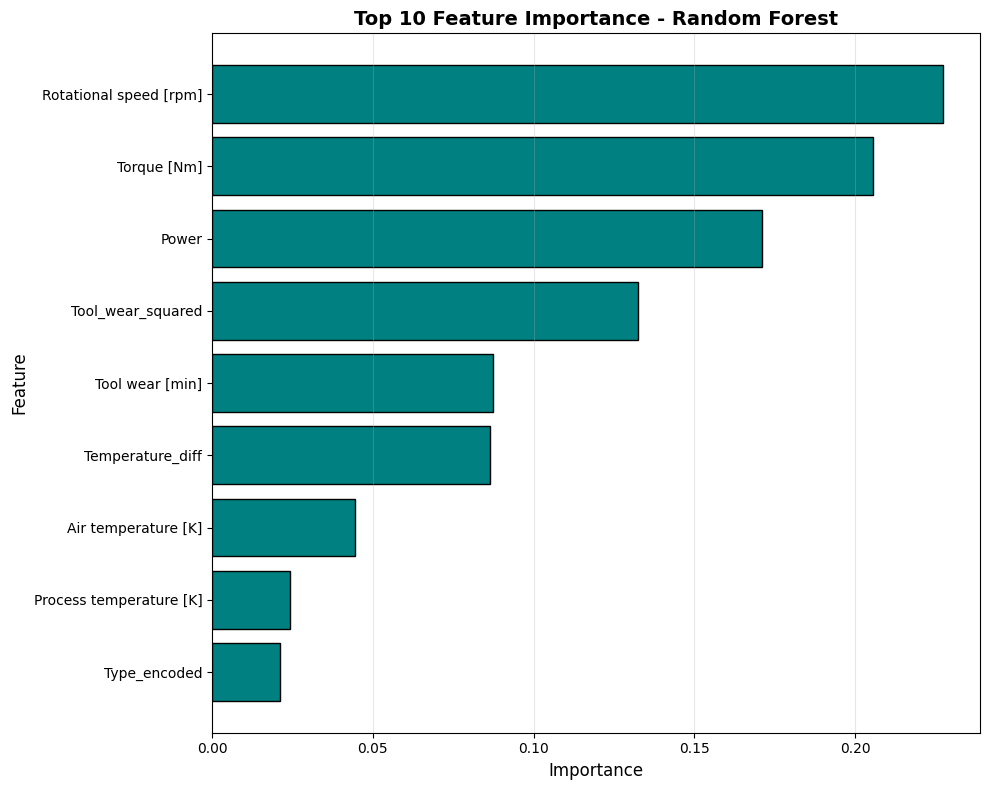

In [33]:
# ============================================================================
# SECTION 13: FEATURE IMPORTANCE (for Random Forest)
# ============================================================================
from sklearn.model_selection import cross_val_score

print("\n\n[SECTION 13] FEATURE IMPORTANCE ANALYSIS")
print("-"*80)

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n--- Top 10 Important Features ---")
    print(feature_importance.head(10))

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(10)
    plt.barh(top_features['Feature'], top_features['Importance'], color='teal', edgecolor='black')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Top 10 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\n✓ Saved: feature_importance.png")

# ============================================================================
# SECTION 14: CROSS-VALIDATION
# ============================================================================
print("\n\n[SECTION 14] CROSS-VALIDATION ANALYSIS")
print("-"*80)

cv_scores = cross_val_score(best_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1')
print(f"\n{best_model_name} - 5-Fold Cross-Validation F1-Scores:")
print(f"Scores: {cv_scores}")
print(f"Mean: {cv_scores.mean():.4f}")
print(f"Std: {cv_scores.std():.4f}")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n\n" + "="*80)
print("PHASE 2 IMPLEMENTATION COMPLETED SUCCESSFULLY")
print("="*80)
print("\n📊 Generated Visualizations:")
print("   • feature_distributions.png")
print("   • outlier_detection.png")
print("   • correlation_heatmap.png")
print("   • confusion_matrix.png")
print("   • model_comparison.png")
print("   • roc_curves.png")
print("   • feature_importance.png")

print("\n🎯 Key Results:")
print(f"   • Best Model: {best_model_name}")
print(f"   • Accuracy: {results_df.loc[best_model_name, 'Accuracy']:.4f}")
print(f"   • Precision: {results_df.loc[best_model_name, 'Precision']:.4f}")
print(f"   • Recall: {results_df.loc[best_model_name, 'Recall']:.4f}")
print(f"   • F1-Score: {results_df.loc[best_model_name, 'F1-Score']:.4f}")
print(f"   • ROC-AUC: {results_df.loc[best_model_name, 'ROC-AUC']:.4f}")

print("\n✅ Ready for Phase 3: Final Report and Dashboard Development")
print("="*80)

In [34]:
import pickle

# Save the trained Random Forest model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
print("✓ Model saved: random_forest_model.pkl")

# Save the scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)
print("✓ Scaler saved: scaler.pkl")

# Optional: Save feature names for reference
feature_names = feature_cols
with open('feature_names.pkl', 'wb') as file:
    pickle.dump(feature_names, file)
print("✓ Feature names saved: feature_names.pkl")

# Download files from Colab
from google.colab import files

files.download('random_forest_model.pkl')
files.download('scaler.pkl')
files.download('feature_names.pkl')

print("\n✅ All files ready for download!")

✓ Model saved: random_forest_model.pkl
✓ Scaler saved: scaler.pkl
✓ Feature names saved: feature_names.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ All files ready for download!
